# ELO

Ce notebook est une presentation du module modele_joueur qui contient notamment les fichiers :
- `estimation.py`
- `simu.py`
- `jeu.py`
- `tournoi.py`
- `visu.py`


In [1]:
from modele_joueur_cor import *

import numpy as np
import matplotlib.pyplot as plt
import random

### Modélisation d'un joueur ###

Un joueur possède :
- un id 
- une force 
- un historique de ses parties
- un historique de ses elos
- un historique de ses glickos

chaque joueur est généré avec une force tirée aléatoirement selon une loi log normal et son elo est initialisé à 1500. 

=== Joueur 1 ===
ID : 0
force : 0.6675032327483224
Historique des Elos : [1500]
Historique des parties : []

=== Joueur 2 ===
ID : 1
force : 0.6993489242771994
Historique des Elos : [1500]
Historique des parties : []



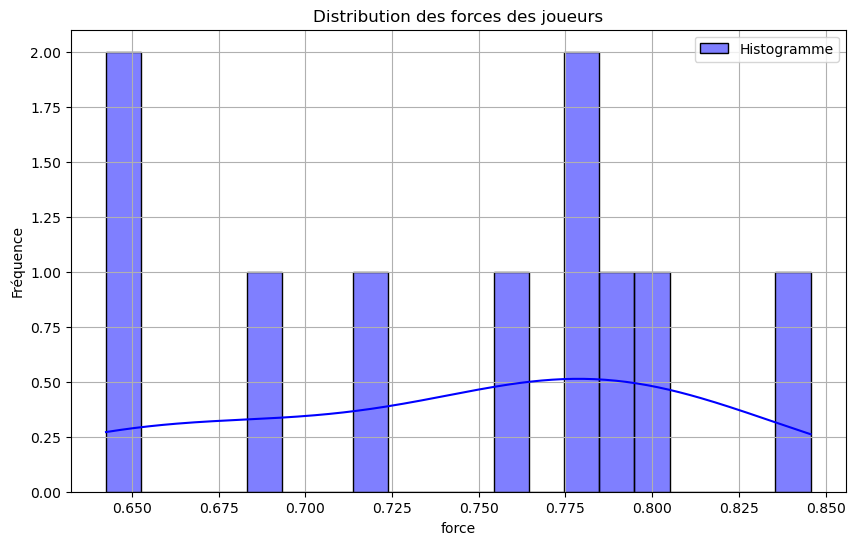

TypeError: tracer_elo() missing 1 required positional argument: 'mode'

In [2]:
joueur1 = generer_joueur()
joueur2 = generer_joueur()

print("=== Joueur 1 ===")
print(joueur1)

print("=== Joueur 2 ===")
print(joueur2)

joueurs = [generer_joueur() for _ in range(10)]

# On trace les forces des joueurs et leurs elos : 

tracer_forces(joueurs)
tracer_elo(joueurs)

### Systeme de rencontre ###

Lors d'une rencontre entres 2 joueurs, on calcule leurs probabilités de victoires respectives à l'aide d'une fonction sigmoide dont le lissage dépend du hasard du jeu et de la différencde de niveaux entres les joueurs. Voici quelques exemples de la sigmoide obtenue pour différents lissages 

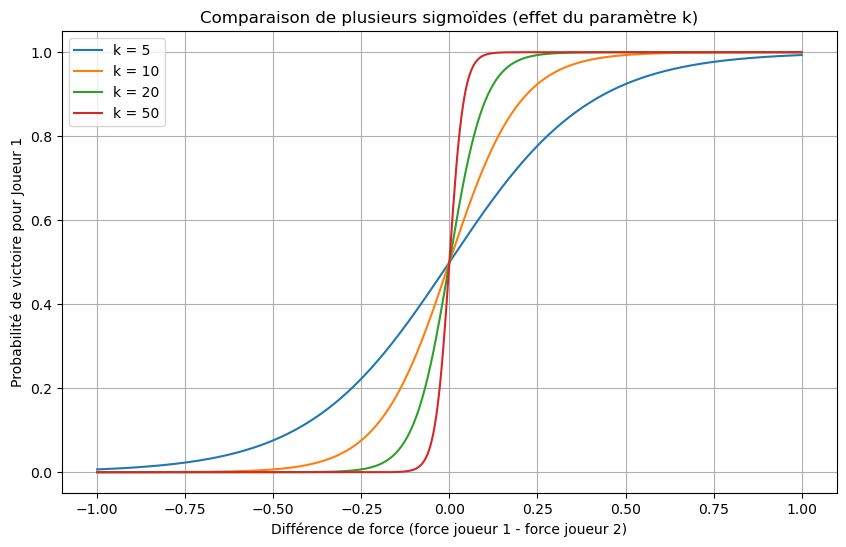

In [3]:
visualiser_plusieurs_sigmoides()

In [55]:
# On créer un jeu et on test le fonctionnement des rencontres simuler 

jeu1 = Jeu("poker", 0.8, 2)

joueur1 = Joueur(0.95, [], [], [], [], [])
joueur2 = Joueur(0., [], [], [], [], [])

tot1 = 0
tot2 = 0

for _ in range(100000) :
    resultat = rencontre_simu(joueur1.force, joueur2.force, jeu1)
    # print(f"Résultat: J1={resultat[0]}, J2={resultat[1]}")
    tot1 += resultat[0]
    tot2 += resultat[1] 
    
print(tot1,tot2)

### PROBLEME sur la simulation des rencontres ###

49677 50323


In [10]:
# On peut également organiser des tournois :

tournoi1 = tournoi_round_robin(joueurs, jeu1, 'simu')



NameError: name 'joueurs' is not defined

## 4. Tests du module `tournoi.py`

In [29]:
classement_rr = tournoi_round_robin(joueurs, jeu1, 1)
print("Classement Round-Robin (Modèle 1):")
for i, joueur in enumerate(classement_rr, 1):
    print(f"{i}. {joueur.id} - Victoires: {sum(joueur.histo_partie)}")

ValueError: Mode inconnu. Utilisez 'simu' ou 'estimation'.

In [ ]:
classement_suisse = tournoi_suisse(joueurs_tournoi.copy(), jeu_strategique, nb_rounds=5, modele=2)
print("\nClassement Suisse (Modèle 2):")
for i, joueur in enumerate(classement_suisse, 1):
    print(f"{i}. {joueur.nom} - Elo: {joueur.histo_elo[-1]:.0f}")

## 5. Tests du module `visu.py`

In [ ]:
tracer_competences(joueurs_tournoi)

In [ ]:
tracer_elo(joueurs_tournoi)

In [ ]:
tracer_force_elo(joueurs_tournoi)

In [ ]:
tracer_evolution_elo(joueurs_tournoi[0])

In [ ]:
tracer_comparaison_evolution_elo(joueurs_tournoi[:3])

In [ ]:
visualiser_plusieurs_sigmoides(k_list=[5, 10, 20, 50])

In [ ]:
tracer_isocontours_hasard(taux_de_hasard=0.3)

In [ ]:
comparer_taux_hasard(taux_liste=[0.1, 0.5, 0.9], impact=1.0)

## 6. Scénario complet

In [ ]:
joueurs_eco = [generer_joueur(f"Comp_{i}", f"P_{i}") for i in range(20)]
jeu_eco = Jeu("Jeu Compétitif", 0.4, 1.2)

for _ in range(3):
    _ = tournoi_suisse(joueurs_eco, jeu_eco, nb_rounds=5, modele=1)
    _ = tournoi_round_robin(random.sample(joueurs_eco, 8), jeu_eco, modele=2)

tracer_competences(joueurs_eco)
tracer_elo(joueurs_eco)
tracer_comparaison_evolution_elo(joueurs_eco[:5])